In [108]:
base_path = '/home/user/Documents/Tim/CDS_Project/repo/CDeeS-DEAM-PMEmo/'
audiofile = f'{base_path}data/DEAM/MEMD_audio/2.mp3'

# This is how the audio we want to process sounds like.
import IPython
IPython.display.Audio(audiofile)

In [109]:
import essentia
import essentia.standard as es

# Compute all features.
# Aggregate 'mean' and 'stdev' statistics for all low-level, rhythm, and tonal frame features.
features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev'],
                                              rhythmStats=['mean', 'stdev'],
                                              tonalStats=['mean', 'stdev'])(audiofile)

print("Filename:", features['metadata.tags.file_name'])
print("-"*80)
print("Replay gain:", features['metadata.audio_properties.replay_gain'])
print("EBU128 integrated loudness:", features['lowlevel.loudness_ebu128.integrated'])
print("EBU128 loudness range:", features['lowlevel.loudness_ebu128.loudness_range'])
print("-"*80)
print("MFCC mean:", features['lowlevel.mfcc.mean'])
print("-"*80)
print("BPM:", features['rhythm.bpm'])
print("Beat positions (sec.)", features['rhythm.beats_position'])
print("-"*80)
print("Key/scale estimation (using a profile specifically suited for electronic music):",
      features['tonal.key_edma.key'], features['tonal.key_edma.scale'])

Filename: 2.mp3
--------------------------------------------------------------------------------
Replay gain: -6.718687057495117
EBU128 integrated loudness: -16.879138946533203
EBU128 loudness range: 3.227781295776367
--------------------------------------------------------------------------------
MFCC mean: [-655.9514     151.36253     -4.103454    28.718271     6.6708317
    6.352892     6.4173126   -1.3158163   -1.9288633    5.872514
   -1.6026502   -2.7403674    5.6955814]
--------------------------------------------------------------------------------
BPM: 93.78003692626953
Beat positions (sec.) [ 0.6617687  1.3003174  1.9504762  2.577415   3.2159636  3.8545125
  4.504671   5.14322    5.781769   6.431927   7.082086   7.720635
  8.359183   8.986122   9.613061  10.24      10.866939  11.505487
 12.144036  12.782585  13.421134  14.071292  14.709841  15.34839
 15.986938  16.625486  17.252426  17.890974  18.529524  19.168072
 19.806622  20.43356   21.10694   21.791927  22.453695  23.092

[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Replay gain
[   INFO   ] MusicExtractor: Compute audio features
[   INFO   ] MusicExtractor: Compute aggregation
[   INFO   ] All done


In [110]:
all_features = features.descriptorNames()

In [111]:
import os
directory = os.fsencode(f'{base_path}data/DEAM/features')
song_ids = []

for file in os.listdir(directory):
  file_name = os.fsdecode(file)
  song_id = int(file_name[:-4])
  song_ids.append(song_id)

song_ids.sort()

In [112]:
import pandas as pd

In [113]:
#single threaded working

song_features_list = []

# for song_id in song_ids:
for song_id in song_ids:
  print(f'SONG ID: {song_id}')
  song_file = f'{base_path}data/DEAM/MEMD_audio/{song_id}.mp3'
  features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev'],
                                                rhythmStats=['mean', 'stdev'],
                                                tonalStats=['mean', 'stdev'])(song_file)

  song_features = []
  
  for selected_feature in all_features:
    song_features.append(features[selected_feature])

  song_features.insert(0, song_id)
  song_features_list.append(song_features)

all_features.insert(0, 'song_id')
df_essentia = pd.DataFrame(song_features_list, columns=all_features)
df_essentia

Process ForkPoolWorker-24:
Process ForkPoolWorker-11:
Process ForkPoolWorker-38:
Process ForkPoolWorker-71:
Process ForkPoolWorker-62:
Process ForkPoolWorker-53:
Process ForkPoolWorker-64:
Process ForkPoolWorker-49:
Process ForkPoolWorker-37:
Process ForkPoolWorker-44:
Process ForkPoolWorker-12:
Process ForkPoolWorker-43:
Process ForkPoolWorker-58:
Process ForkPoolWorker-42:
Process ForkPoolWorker-63:
Process ForkPoolWorker-54:
Process ForkPoolWorker-61:
Process ForkPoolWorker-48:
Process ForkPoolWorker-13:
Process ForkPoolWorker-36:
Process ForkPoolWorker-40:
Process ForkPoolWorker-50:
Process ForkPoolWorker-41:
Process ForkPoolWorker-52:
Process ForkPoolWorker-56:
Process ForkPoolWorker-15:
Process ForkPoolWorker-60:
Process ForkPoolWorker-1:
Process ForkPoolWorker-65:
Process ForkPoolWorker-47:
Process ForkPoolWorker-29:
Process ForkPoolWorker-31:
Process ForkPoolWorker-59:
Process ForkPoolWorker-55:
Process ForkPoolWorker-51:
Process ForkPoolWorker-72:
Process ForkPoolWorker-27:
Pr

SONG ID: 2
SONG ID: 3
SONG ID: 4
SONG ID: 5


[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Replay gain
[   INFO   ] MusicExtractor: Compute audio features
[   INFO   ] MusicExtractor: Compute aggregation
[   INFO   ] All done
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Replay gain
[   INFO   ] MusicExtractor: Compute audio features
[   INFO   ] MusicExtractor: Compute aggregation
[   INFO   ] All done
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Replay gain
[   INFO   ] MusicExtractor: Compute audio features
[   INFO   ] MusicExtractor: Compute aggregation
[   INFO   ] All done
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, a

KeyboardInterrupt: 

In [ ]:
# #chatgpt parallelise not working

# import pandas as pd
# import essentia.standard as es
# from concurrent.futures import ThreadPoolExecutor

# def extract_features(song_id):
#     print(f'Extracting features for song ID: {song_id}')
#     song_file = f'{base_path}data/DEAM/MEMD_audio/{song_id}.mp3'
#     features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev'],
#                                                   rhythmStats=['mean', 'stdev'],
#                                                   tonalStats=['mean', 'stdev'])(song_file)

#     song_features = [features[selected_feature] for selected_feature in all_features[1:]]  # Exclude song_id
#     song_features.insert(0, song_id)
#     return song_features

# # Define the list of song IDs
# song_ids = [...]  # Your list of song IDs

# # Define the list of all features (excluding song_id)
# all_features = [...]  # Your list of all features

# # Initialize an empty list to store song features
# song_features_list = []

# # Create a ThreadPoolExecutor with max_workers set to the number of available CPU cores
# max_workers = None  # Set it to the desired number of CPU cores or leave it as None for auto-detection
# with ThreadPoolExecutor(max_workers=max_workers) as executor:
#     # Submit tasks for each song ID and asynchronously extract features
#     futures = [executor.submit(extract_features, song_id) for song_id in song_ids]

#     # Gather results as they become available
#     # for future in futures:
#     #     song_features_list.append(future.result())

# # Create DataFrame from the collected song features
# all_features.insert(0, 'song_id')
# df_essentia = pd.DataFrame(song_features_list, columns=all_features)
# # print(df_essentia)


Extracting features for song ID: Ellipsis


[   INFO   ] MusicExtractor: Read metadata


In [ ]:
#THE BIG BOI FEATURE EXTRACTION

import multiprocessing

def process_song(song_id):
    print(f'SONG ID: {song_id}')
    song_file = f'{base_path}data/DEAM/MEMD_audio/{song_id}.mp3'
    features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev'],
                                                  rhythmStats=['mean', 'stdev'],
                                                  tonalStats=['mean', 'stdev'])(song_file)

    song_features = []
    
    for selected_feature in all_features:
        song_features.append(features[selected_feature])

    song_features.insert(0, song_id)
    
    return song_features

if __name__ == '__main__':
    pool = multiprocessing.Pool()  # Create a pool of processes
    
    # Map the process_song function to each song_id using multiple processes
    results = pool.map(process_song, song_ids)
    
    pool.close()
    pool.join()

# Construct the DataFrame after all songs have been processed
all_features.insert(0, 'song_id')
df_essentia = pd.DataFrame(results, columns=all_features)
df_essentia

#run 1: 5m 42sec

In [115]:
df_essentia

,song_id,lowlevel.average_loudness,lowlevel.barkbands_crest.mean,lowlevel.barkbands_crest.stdev,lowlevel.barkbands_flatness_db.mean,lowlevel.barkbands_flatness_db.stdev,lowlevel.barkbands_kurtosis.mean,lowlevel.barkbands_kurtosis.stdev,lowlevel.barkbands_skewness.mean,lowlevel.barkbands_skewness.stdev,...,metadata.version.essentia_git_sha,metadata.version.extractor,tonal.chords_key,tonal.chords_scale,tonal.key_edma.key,tonal.key_edma.scale,tonal.key_krumhansl.key,tonal.key_krumhansl.scale,tonal.key_temperley.key,tonal.key_temperley.scale
0,2,0.960248,11.212007,3.561726,0.172936,0.040402,7.693447,14.993551,2.125454,1.463200,...,v2.1_beta5-1110-g77a6a954,music 2.0,A,minor,D,minor,D,minor,A,minor
1,3,0.577547,16.433359,4.686501,0.308801,0.088980,56.492889,70.697540,5.294929,2.944535,...,v2.1_beta5-1110-g77a6a954,music 2.0,E,minor,A,minor,A,minor,A,minor
2,4,0.978169,10.575949,3.460420,0.188169,0.060343,5.971595,8.925011,1.977167,1.211891,...,v2.1_beta5-1110-g77a6a954,music 2.0,A,minor,D,minor,D,minor,A,minor
3,5,0.902877,11.478830,4.084089,0.219517,0.053678,10.837265,13.638244,2.346603,1.403244,...,v2.1_beta5-1110-g77a6a954,music 2.0,B,major,B,major,B,major,B,major
4,7,0.978392,15.759046,3.721531,0.324880,0.086044,56.903275,50.224751,5.053317,2.367954,...,v2.1_beta5-1110-g77a6a954,music 2.0,G,major,C,major,C,major,C,major
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,2054,0.575124,15.827234,4.453311,0.402328,0.079873,16.945381,21.000000,2.181591,1.672682,...,v2.1_beta5-1110-g77a6a954,music 2.0,A,minor,A,minor,A,minor,A,minor
1798,2055,0.815881,12.440861,5.942699,0.176157,0.092035,11.953767,55.289692,1.566054,2.614750,...,v2.1_beta5-1110-g77a6a954,music 2.0,G,minor,G,minor,G,minor,G,minor
1799,2056,0.689037,13.477165,5.172672,0.220766,0.082873,14.666655,47.530125,2.341510,2.076143,...,v2.1_beta5-1110-g77a6a954,music 2.0,D,minor,C,major,C,major,C,major
1800,2057,0.928223,10.148836,3.845767,0.126059,0.048690,4.188001,8.960086,1.576292,1.198969,...,v2.1_beta5-1110-g77a6a954,music 2.0,B,minor,B,minor,B,minor,B,minor


In [116]:
#export df_essentia to csv
df_essentia.to_csv(f'{base_path}data/DEAM/features/PROCESSED_essentia_features.csv', index=False)

In [118]:
!pip install librosa

  Using cached librosa-0.10.1-py3-none-any.whl (253 kB)
  Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
     |████████████████████████████████| 390 kB 4.6 MB/s eta 0:00:01
  Using cached soxr-0.3.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached numba-0.58.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
  Using cached soundfile-0.12.1-py2.py3-none-any.whl (24 kB)
     |████████████████████████████████| 62 kB 4.6 MB/s  eta 0:00:01
  Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
  Using cached llvmlite-0.41.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.6 MB)


/tmp/ipykernel_173483/2802047841.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('/home/user/Documents/Tim/CDS_Project/repo/CDeeS-DEAM-PMEmo/data/DEAM/MEMD_audio/2.mp3')
/home/user/Documents/jupyter/venv/lib/python3.8/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


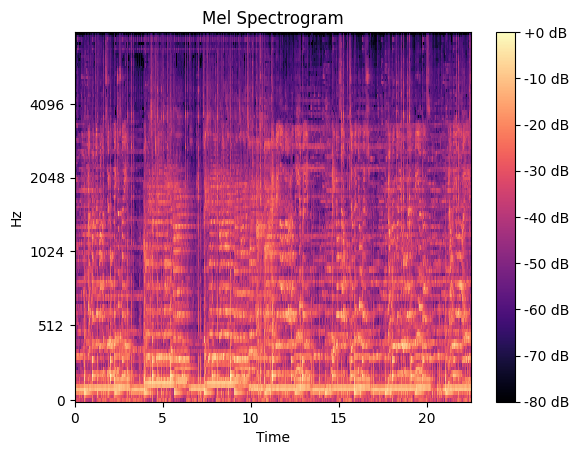

In [123]:
#generating mel spectrogram

import numpy as np
import librosa
import matplotlib.pyplot as plt

y, sr = librosa.load('/home/user/Documents/Tim/CDS_Project/repo/CDeeS-DEAM-PMEmo/data/DEAM/MEMD_audio/2.mp3')

# spec = np.abs(librosa.stft(y, hop_length=512))
# spec = librosa.amplitude_to_db(spec, ref=np.max)

spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');